In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/speech-emotion-recognition-en/Savee/JE_h09.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_f12.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_h03.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_d04.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a14.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_h15.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_su02.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_a06.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_n01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_n22.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a10.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_n08.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_sa13.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_a12.wav
/kaggle/input/speech-e

In [21]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio

In [22]:
Root_dir = '/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24/'

In [23]:
Ravdess_dir_list = os.listdir(Root_dir)

In [24]:
Ravdess_dir_list[:15]

['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22']

In [28]:
emotions_ravdess = []
path_ravdess = []

for file in Ravdess_dir_list:
    actor = os.listdir(Root_dir + file)
    for audioname in actor:
        part = audioname.split('.')[0]
        part = part.split('-')
        # Third Part Represent Emotion associated with that file
        emotions_ravdess.append(part[2])
        path_ravdess.append(Root_dir + file + '/' + audioname)


emotions_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess,columns=['Path'])
Ravdess_df = pd.concat([emotions_ravdess_df,path_ravdess_df] , axis = 1)

Ravdess_df

Emotions                                               Path
0          08  /kaggle/input/speech-emotion-recognition-en/Ra...
1          01  /kaggle/input/speech-emotion-recognition-en/Ra...
2          07  /kaggle/input/speech-emotion-recognition-en/Ra...
3          07  /kaggle/input/speech-emotion-recognition-en/Ra...
4          01  /kaggle/input/speech-emotion-recognition-en/Ra...
...       ...                                                ...
1435       06  /kaggle/input/speech-emotion-recognition-en/Ra...
1436       05  /kaggle/input/speech-emotion-recognition-en/Ra...
1437       04  /kaggle/input/speech-emotion-recognition-en/Ra...
1438       07  /kaggle/input/speech-emotion-recognition-en/Ra...
1439       05  /kaggle/input/speech-emotion-recognition-en/Ra...

[1440 rows x 2 columns]

In [32]:
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].astype(int)


In [33]:
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
})

Ravdess_df.head()

Emotions                                               Path
0  surprise  /kaggle/input/speech-emotion-recognition-en/Ra...
1   neutral  /kaggle/input/speech-emotion-recognition-en/Ra...
2   disgust  /kaggle/input/speech-emotion-recognition-en/Ra...
3   disgust  /kaggle/input/speech-emotion-recognition-en/Ra...
4   neutral  /kaggle/input/speech-emotion-recognition-en/Ra...

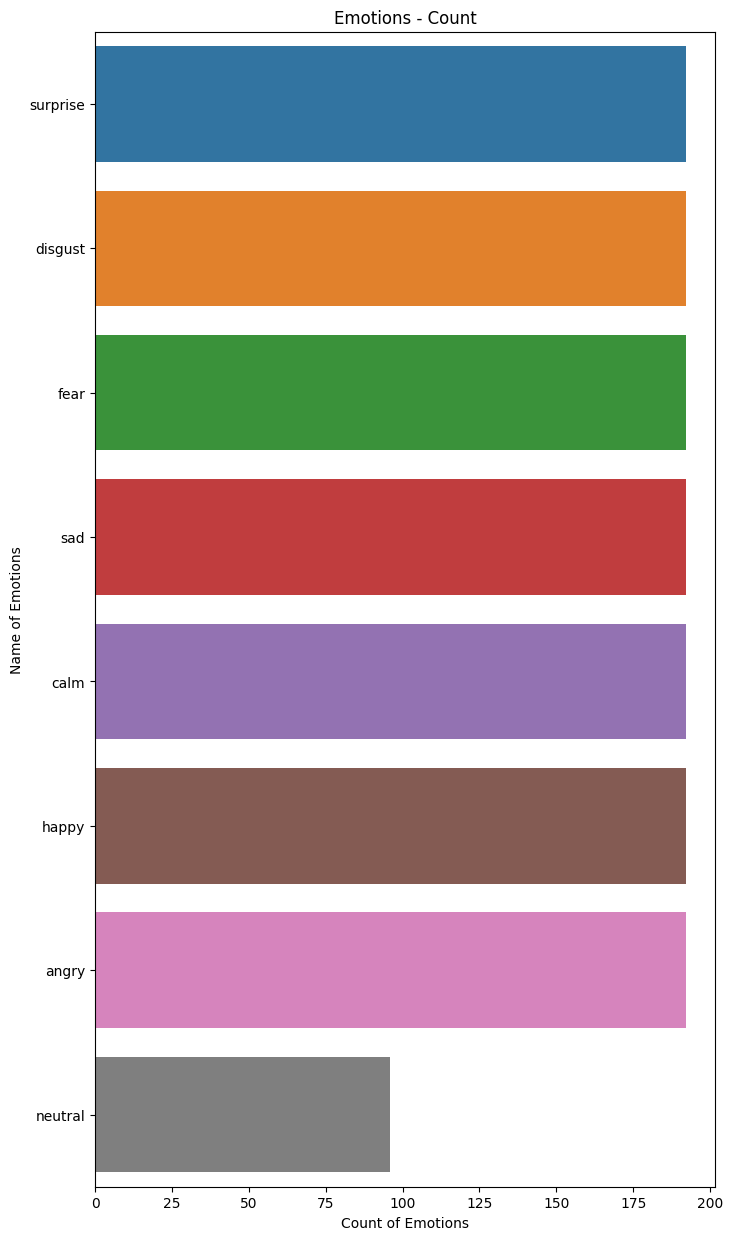

In [34]:
plt.figure(figsize=(8,15))
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x = Count_emotion, y = Count_emotion.index)
plt.ylabel('Name of Emotions')
plt.xlabel('Count of Emotions')
plt.title("Emotions - Count")
plt.show()

In [48]:
def plot_and_play_emotion(Ravdess_df, emotion='fear'):
    # Filter the dataframe to get the path of the first audio file for the specified emotion
    audio_path = Ravdess_df[Ravdess_df['Emotions'] == emotion]['Path'].iloc[0]
    
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path)
    
    # Plot the waveform of the audio sample
    plt.figure(figsize=(12, 4), dpi=200)
    plt.plot(audio, color='#2E40CB')
    plt.xlabel('Sample', fontdict={'size': 14, 'weight': 'bold'})
    plt.ylabel('Amplitude', fontdict={'size': 14, 'weight': 'bold'})
    plt.title(f'Waveform - {emotion}', fontdict={'size': 16, 'weight': 'bold'})
    plt.show()
    
    # Play the audio
    return Audio(audio_path)

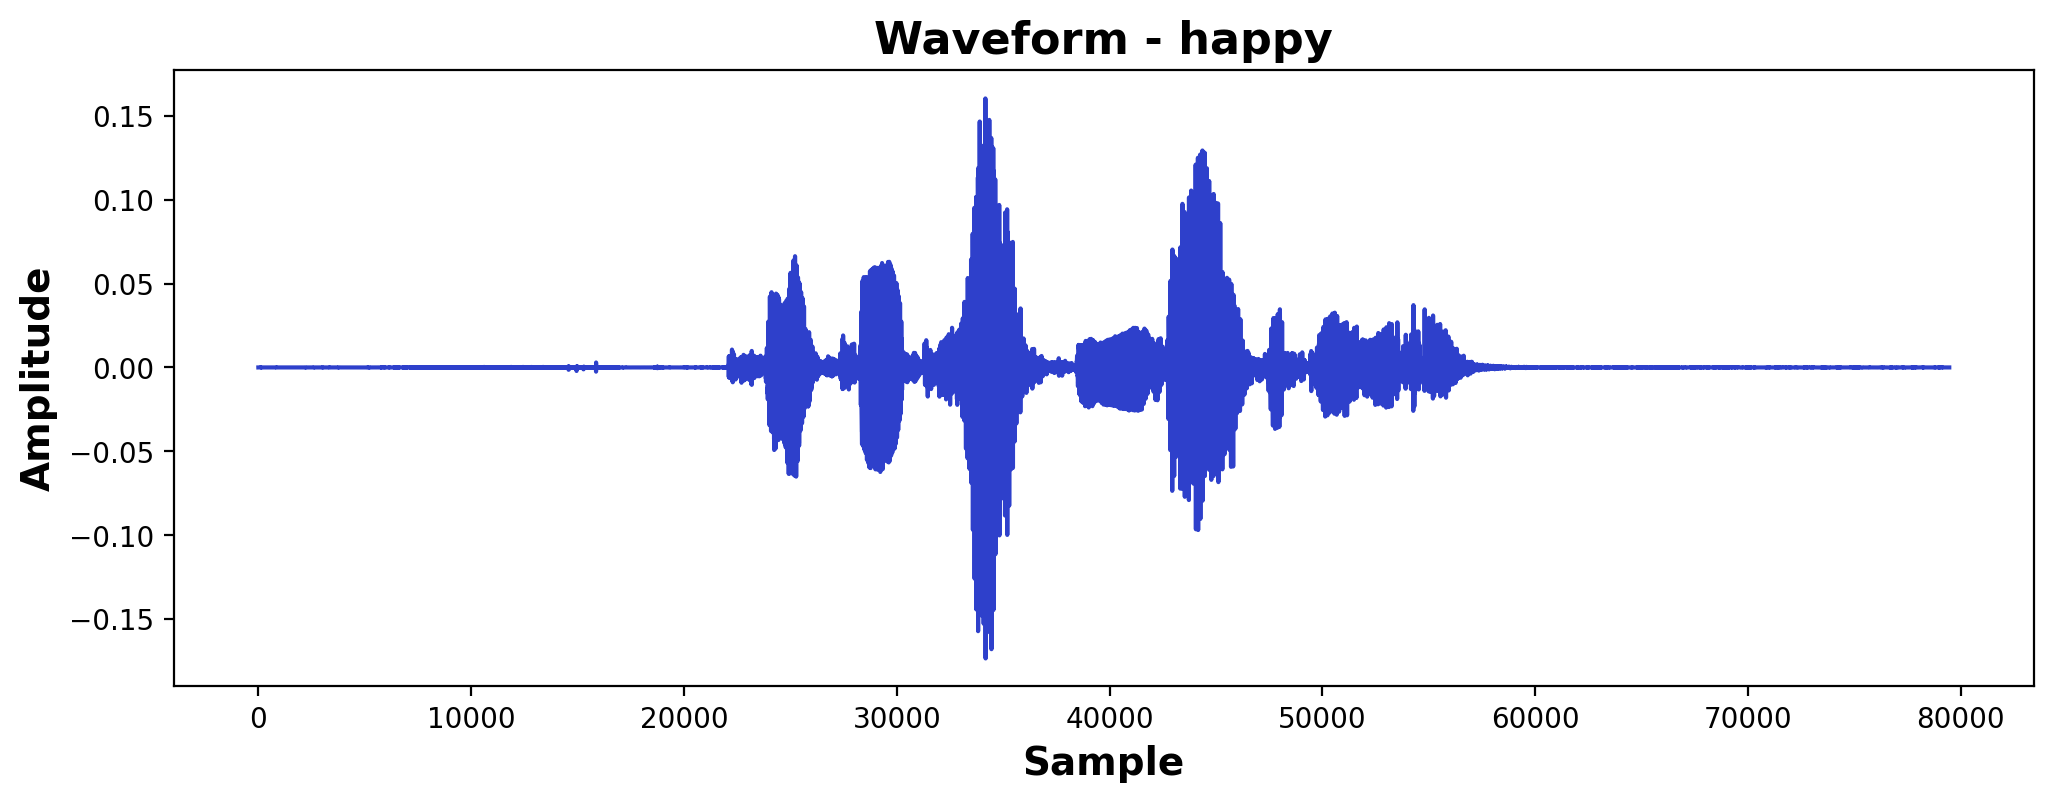

In [49]:
plot_and_play_emotion(Ravdess_df,'happy')

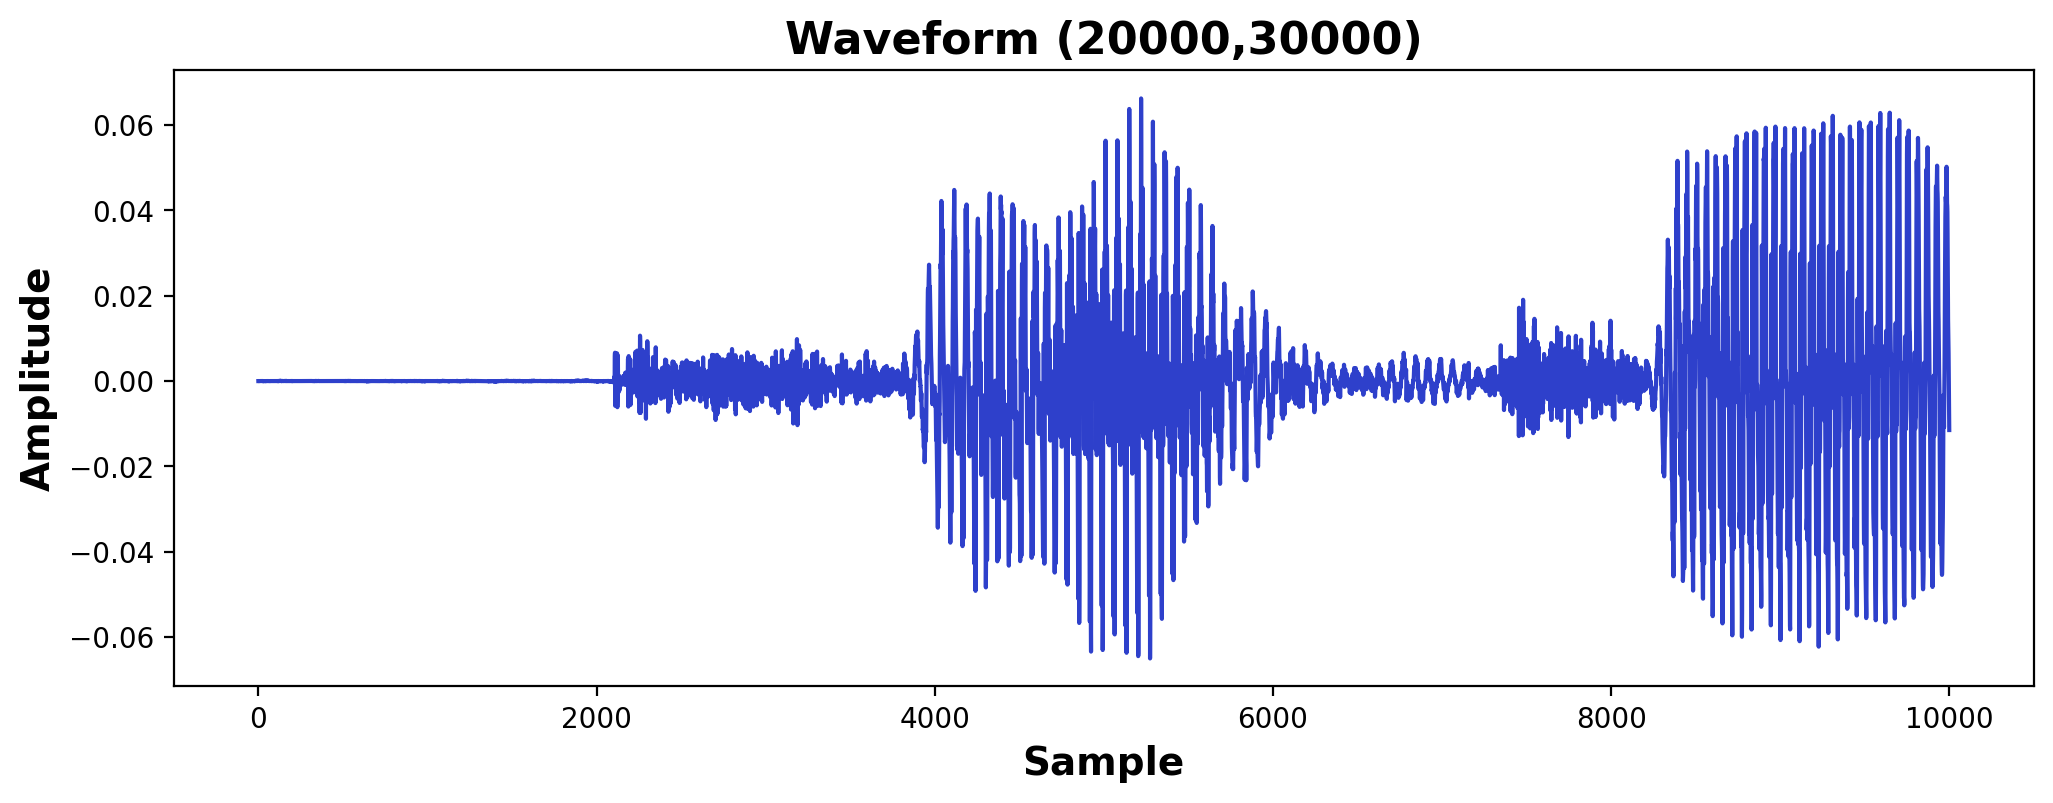

In [50]:
def plot_waveform_segment(emotion, start_sample, end_sample, dataframe):
    # Filter the dataframe for the specified emotion
    emotion_sp = dataframe[dataframe['Emotions'] == emotion]['Path']
    
    if emotion_sp.empty:
        print(f"No files found for emotion: {emotion}")
        return
    
    # Load the audio data for the first file of the given emotion
    audio_path = emotion_sp.iloc[0]  # Get the first path of the emotion
    audio, sr = librosa.load(audio_path)  # Load audio using librosa
    
    # Slice the audio array for the specific segment (from start_sample to end_sample)
    audio_segment = audio[start_sample:end_sample]
    
    # Plotting the waveform segment
    plt.figure(figsize=(12, 4), dpi=200)
    plt.plot(audio_segment, color='#2E40CB')  # Plot the segment
    plt.xlabel('Sample', fontdict={'size': 14, 'weight': 'bold'})
    plt.ylabel('Amplitude', fontdict={'size': 14, 'weight': 'bold'})
    plt.title(f'Waveform ({start_sample},{end_sample})', fontdict={'size': 16, 'weight': 'bold'})
    plt.show()
    
    # Play the audio corresponding to the selected segment
    return Audio(audio_path)  # This will play the audio in Jupyter notebook

# Example for 'happy' emotion, plotting the segment from sample 20000 to 30000
plot_waveform_segment('happy', 20000, 30000, Ravdess_df)

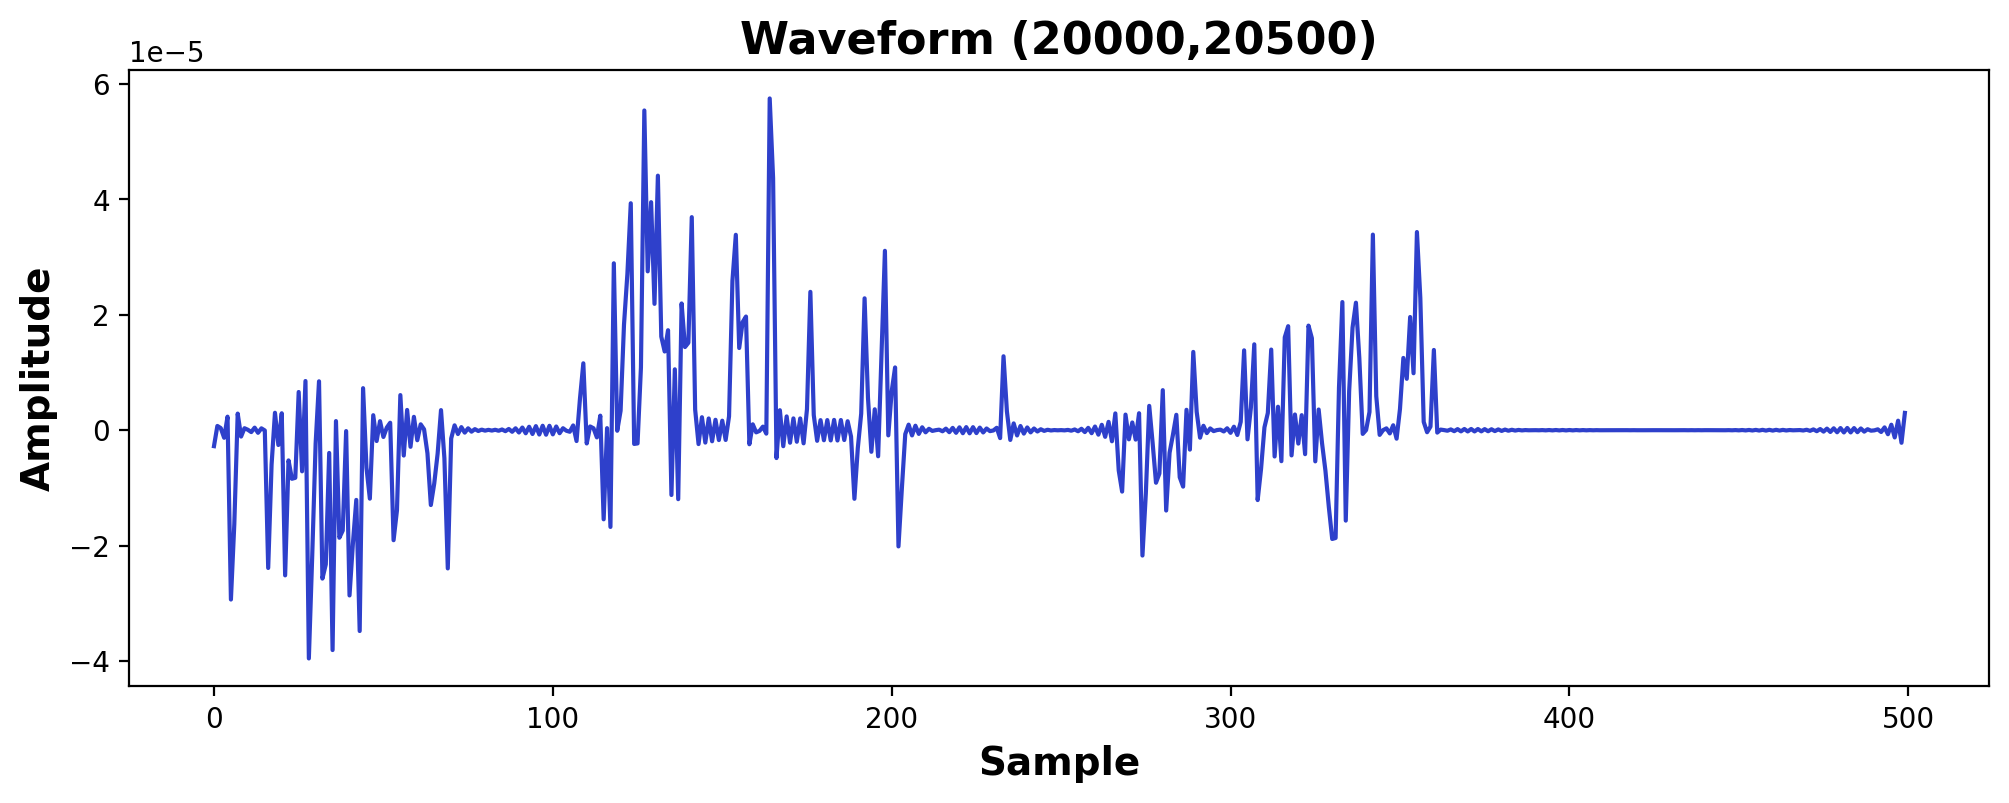

In [47]:
def plot_waveform(emotion, start_sample, end_sample, dataframe):
    # Filter the dataframe for the specified emotion
    emotion_sp = dataframe[dataframe['Emotions'] == emotion]['Path']
    
    if emotion_sp.empty:
        print(f"No files found for emotion: {emotion}")
        return
    
    # Load the audio data for the first file of the given emotion
    audio_path = emotion_sp.iloc[0]  # Get the first path of the emotion
    audio, sr = librosa.load(audio_path)  # Load audio using librosa
    
    # Slice the audio array for the specific segment (from start_sample to end_sample)
    audio_segment = audio[start_sample:end_sample]
    
    # Plotting the waveform segment
    plt.figure(figsize=(12, 4), dpi=200)
    plt.plot(audio_segment, color='#2E40CB')  # Plot the segment with a color
    plt.xlabel('Sample', fontdict={'size': 14, 'weight': 'bold'})
    plt.ylabel('Amplitude', fontdict={'size': 14, 'weight': 'bold'})
    plt.title(f'Waveform ({start_sample},{end_sample})', fontdict={'size': 16, 'weight': 'bold'})
    plt.show()

    # Play the audio corresponding to the selected segment
    return Audio(audio_path)  # This will play the entire audio in Jupyter notebook

# Example for 'happy' emotion, plotting the segment from sample 20000 to 20500
plot_waveform('happy', 20000, 20500, Ravdess_df)

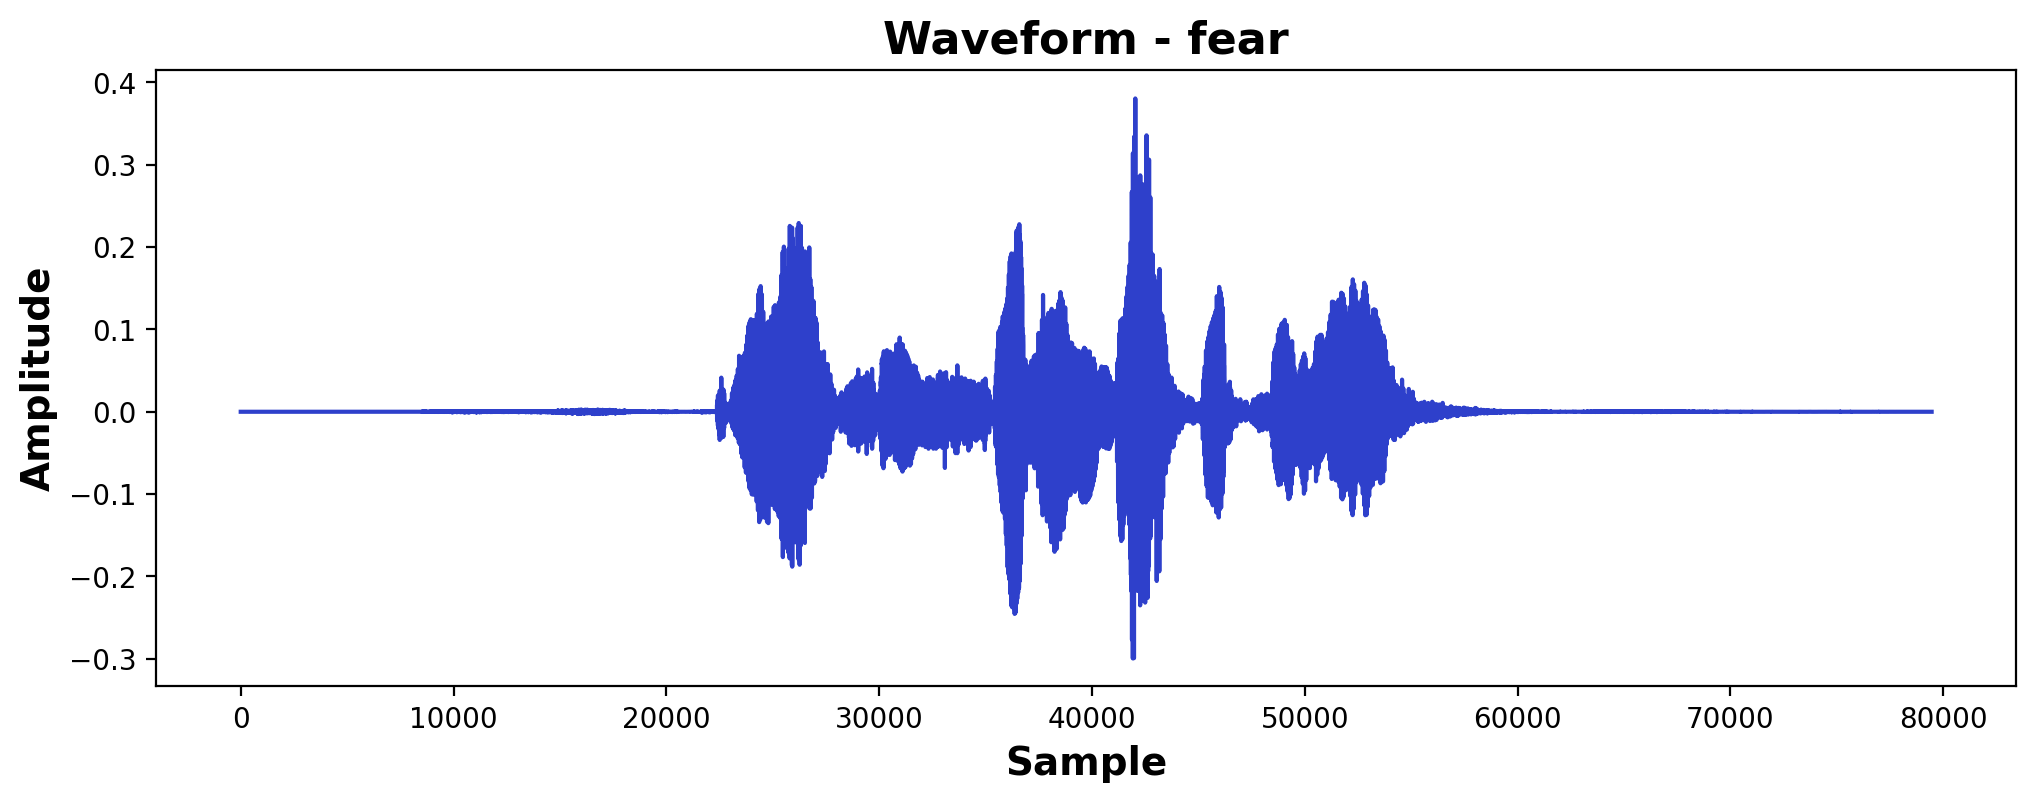

In [52]:
plot_and_play_emotion(Ravdess_df,'fear')

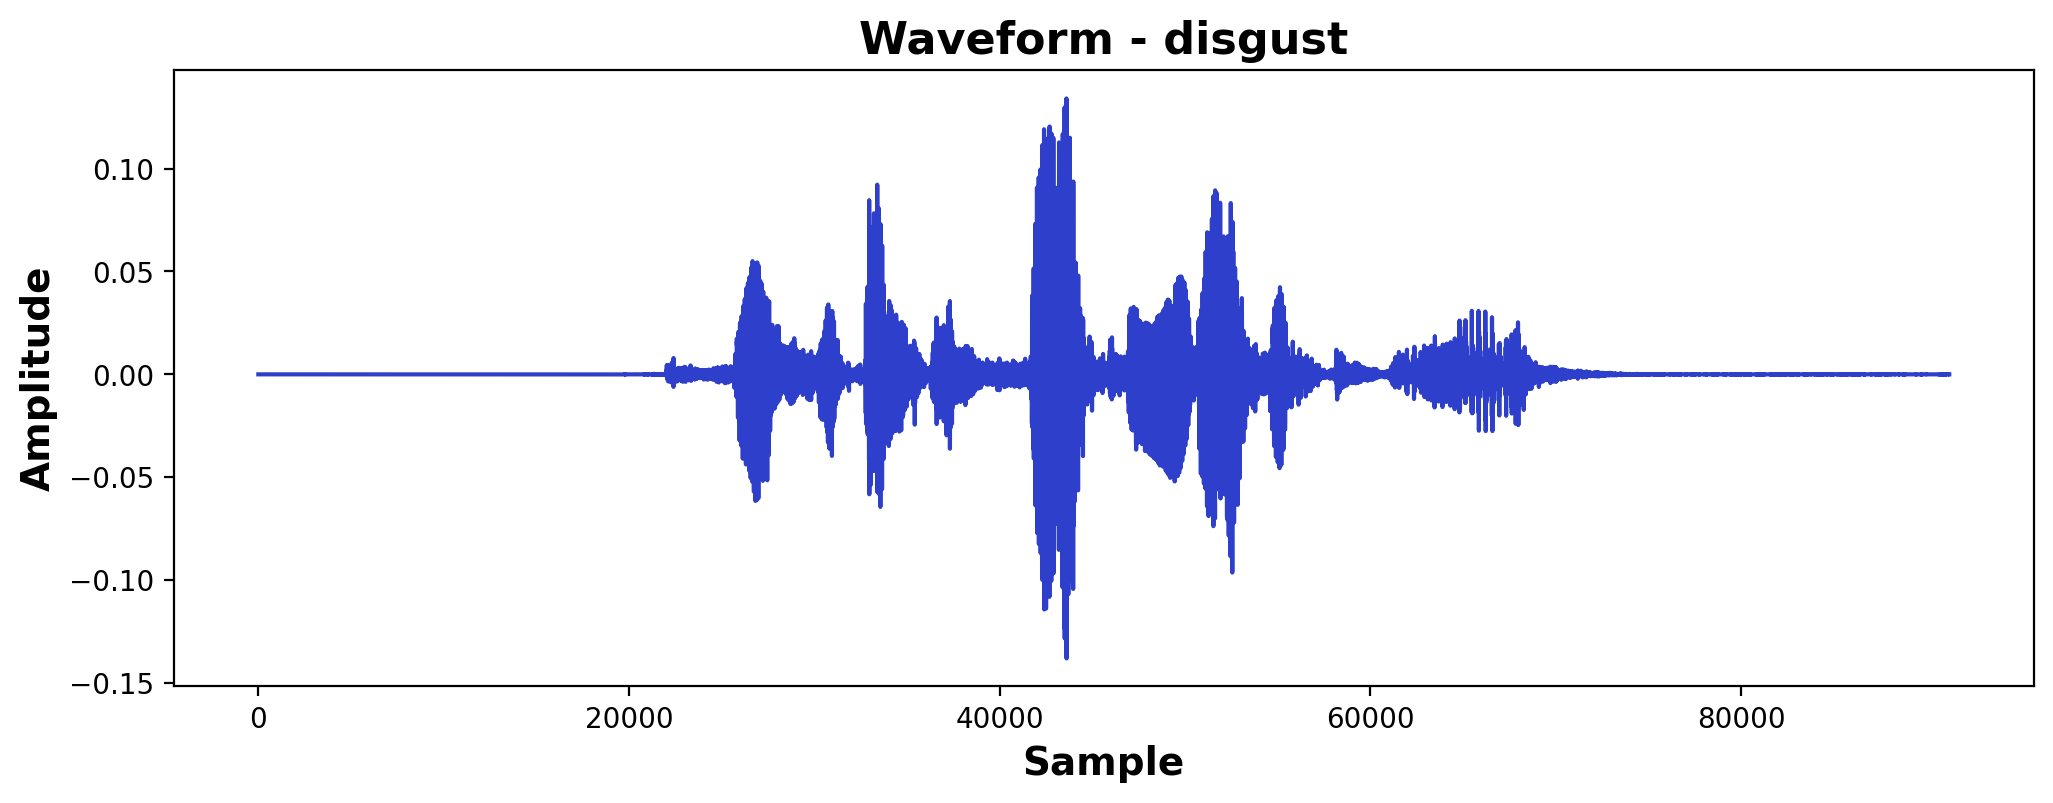

In [53]:
plot_and_play_emotion(Ravdess_df,'disgust')

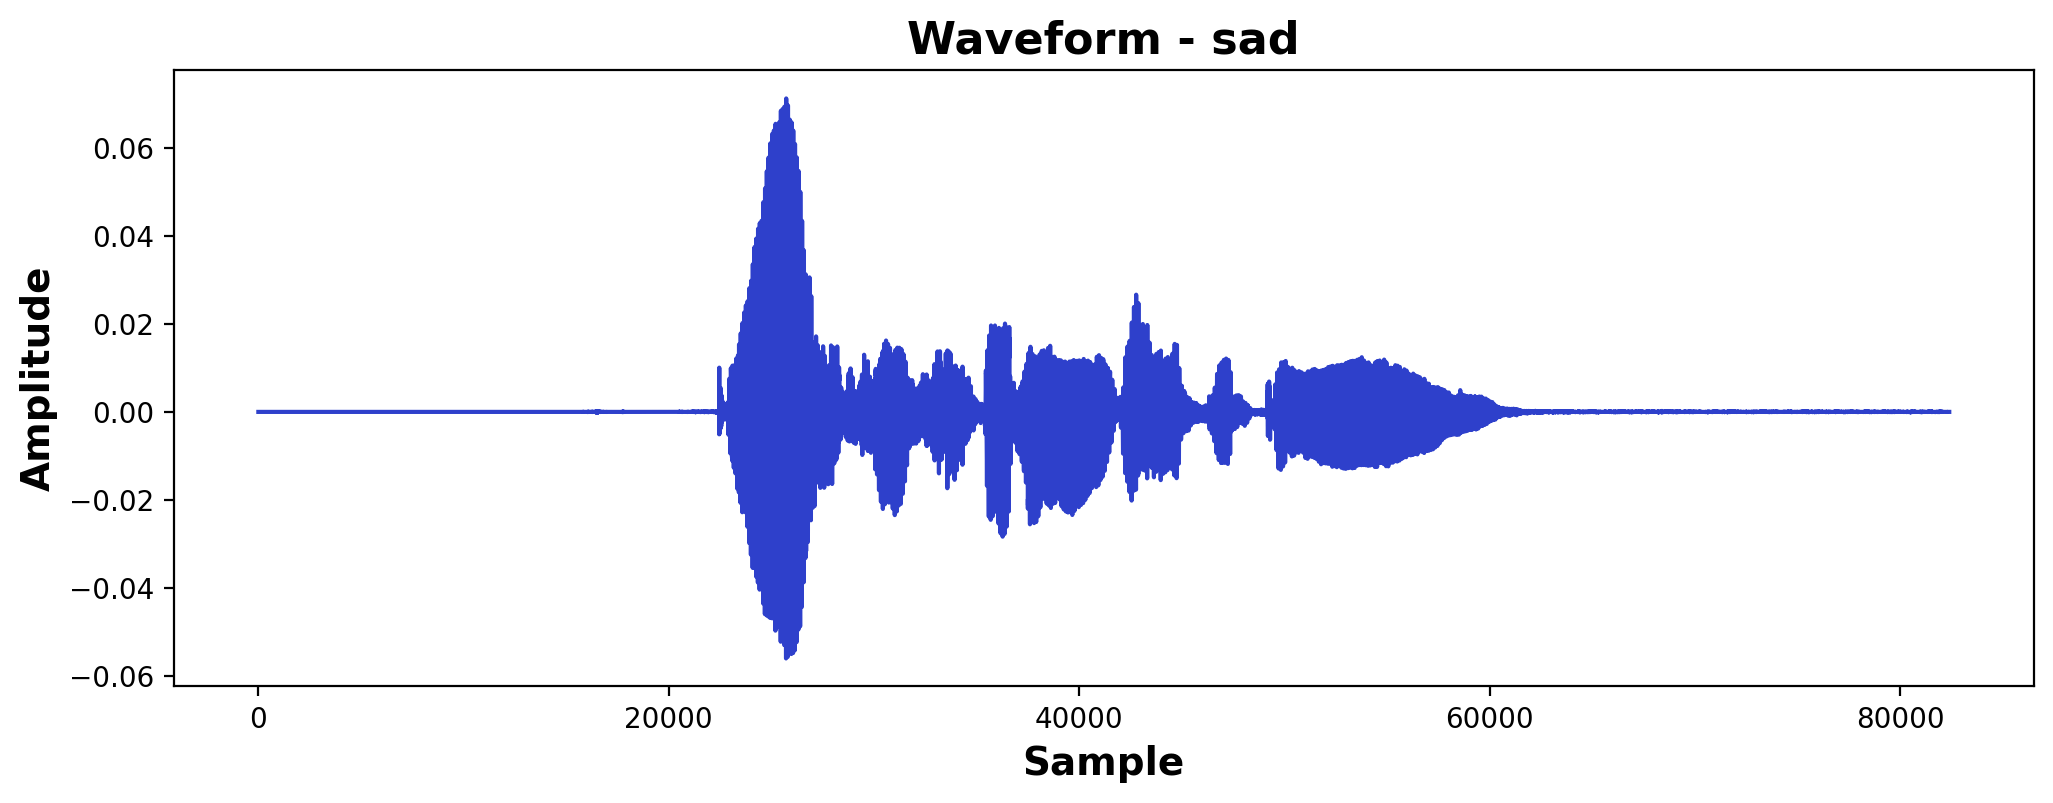

In [54]:
plot_and_play_emotion(Ravdess_df,'sad')

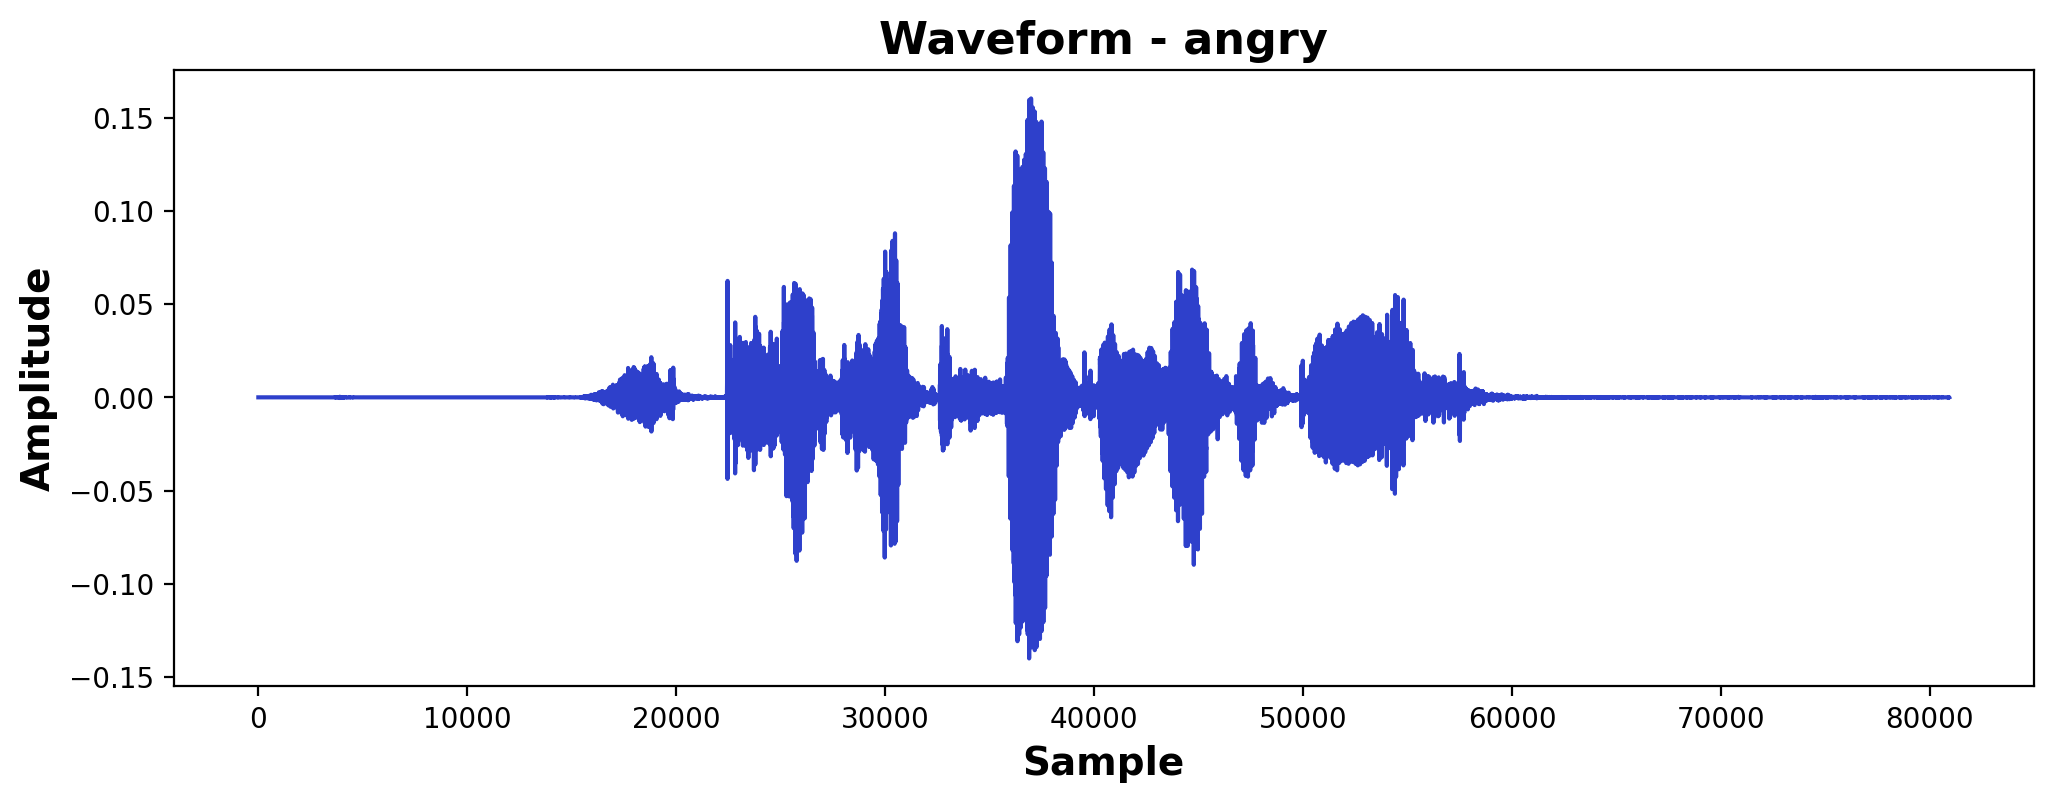

In [55]:
plot_and_play_emotion(Ravdess_df,'angry')

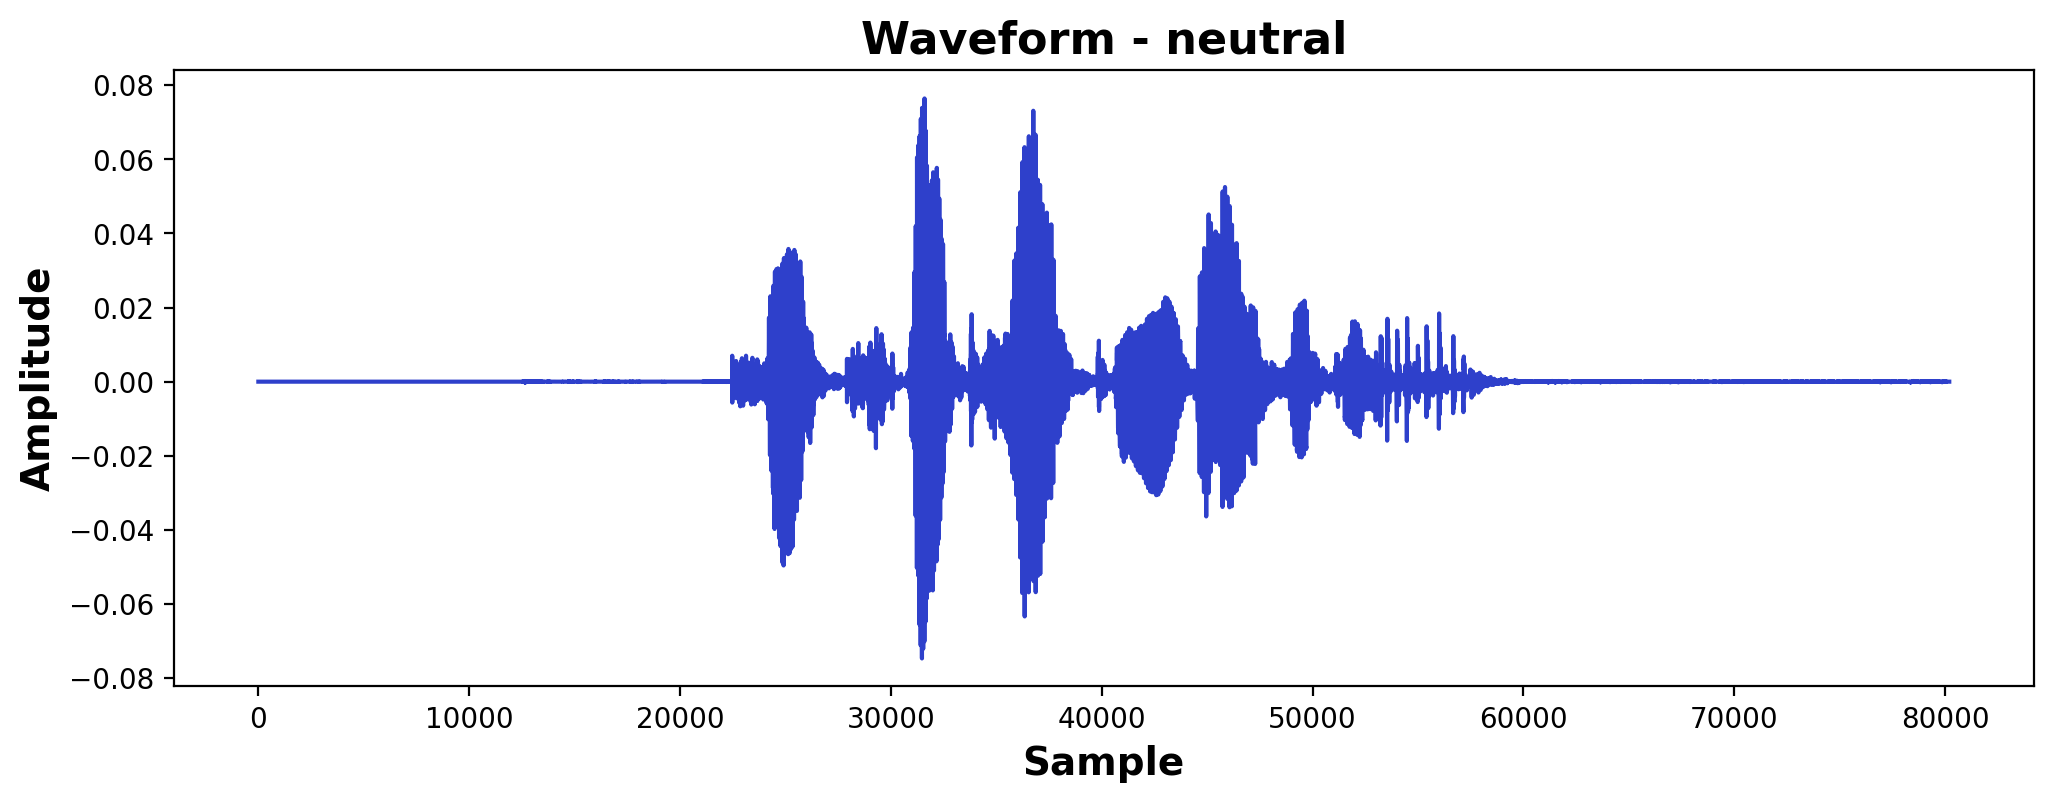

In [56]:
plot_and_play_emotion(Ravdess_df,'neutral')

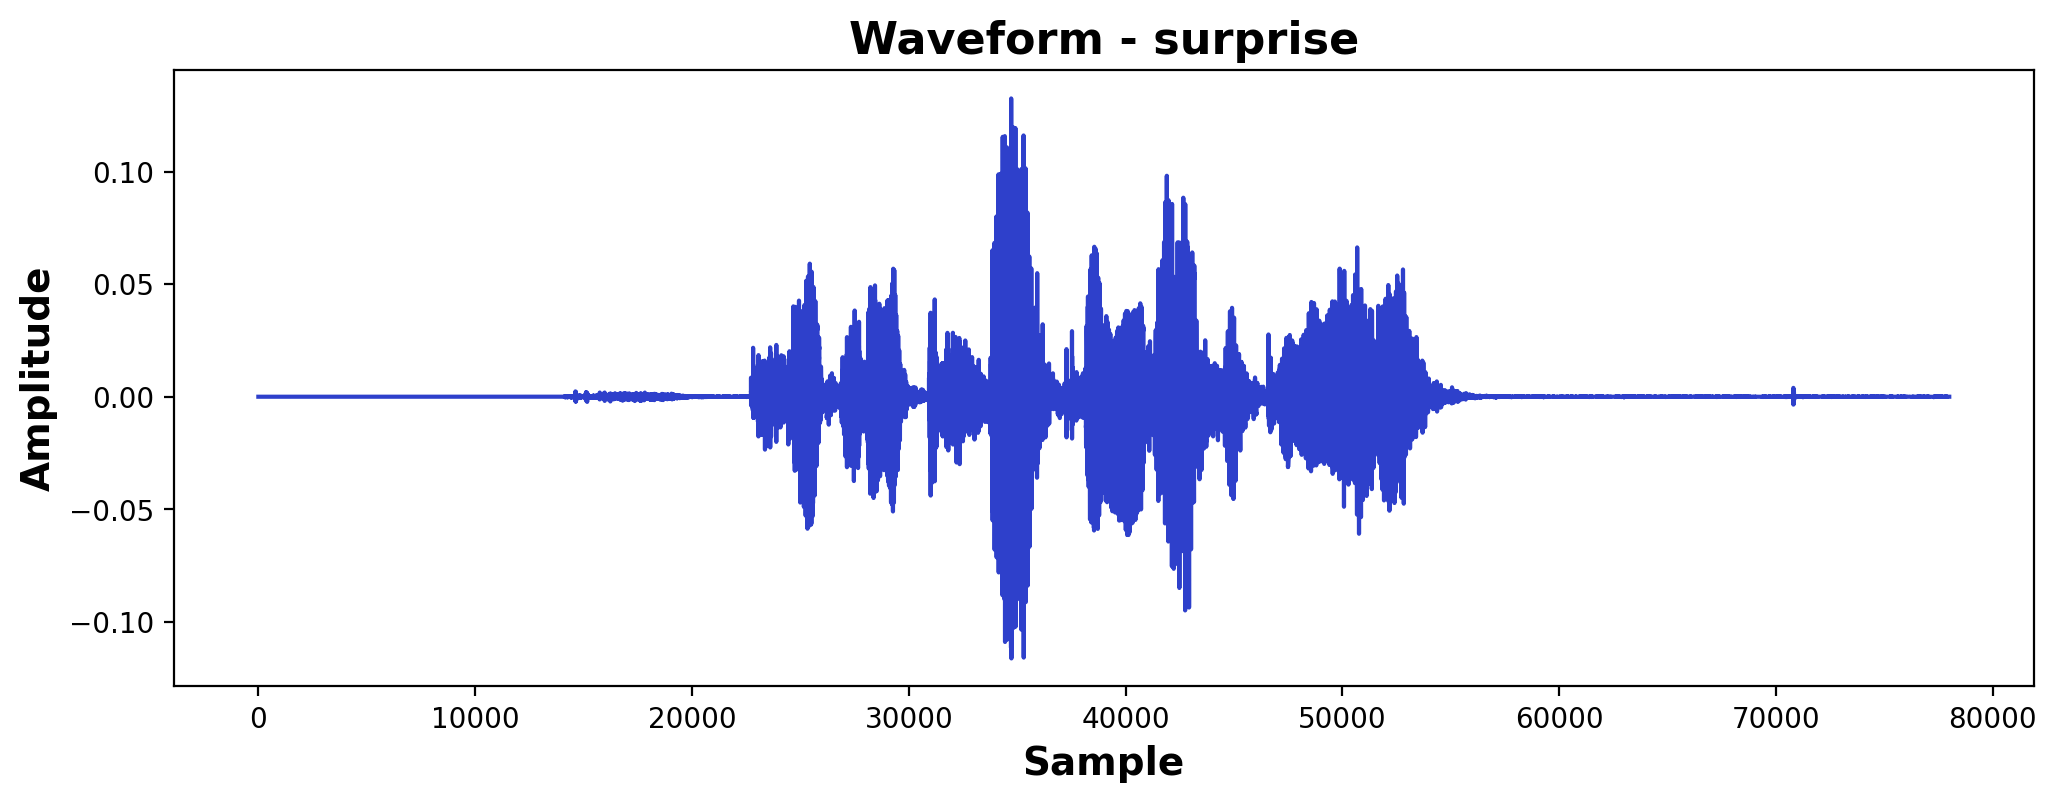

In [58]:
plot_and_play_emotion(Ravdess_df,'surprise')

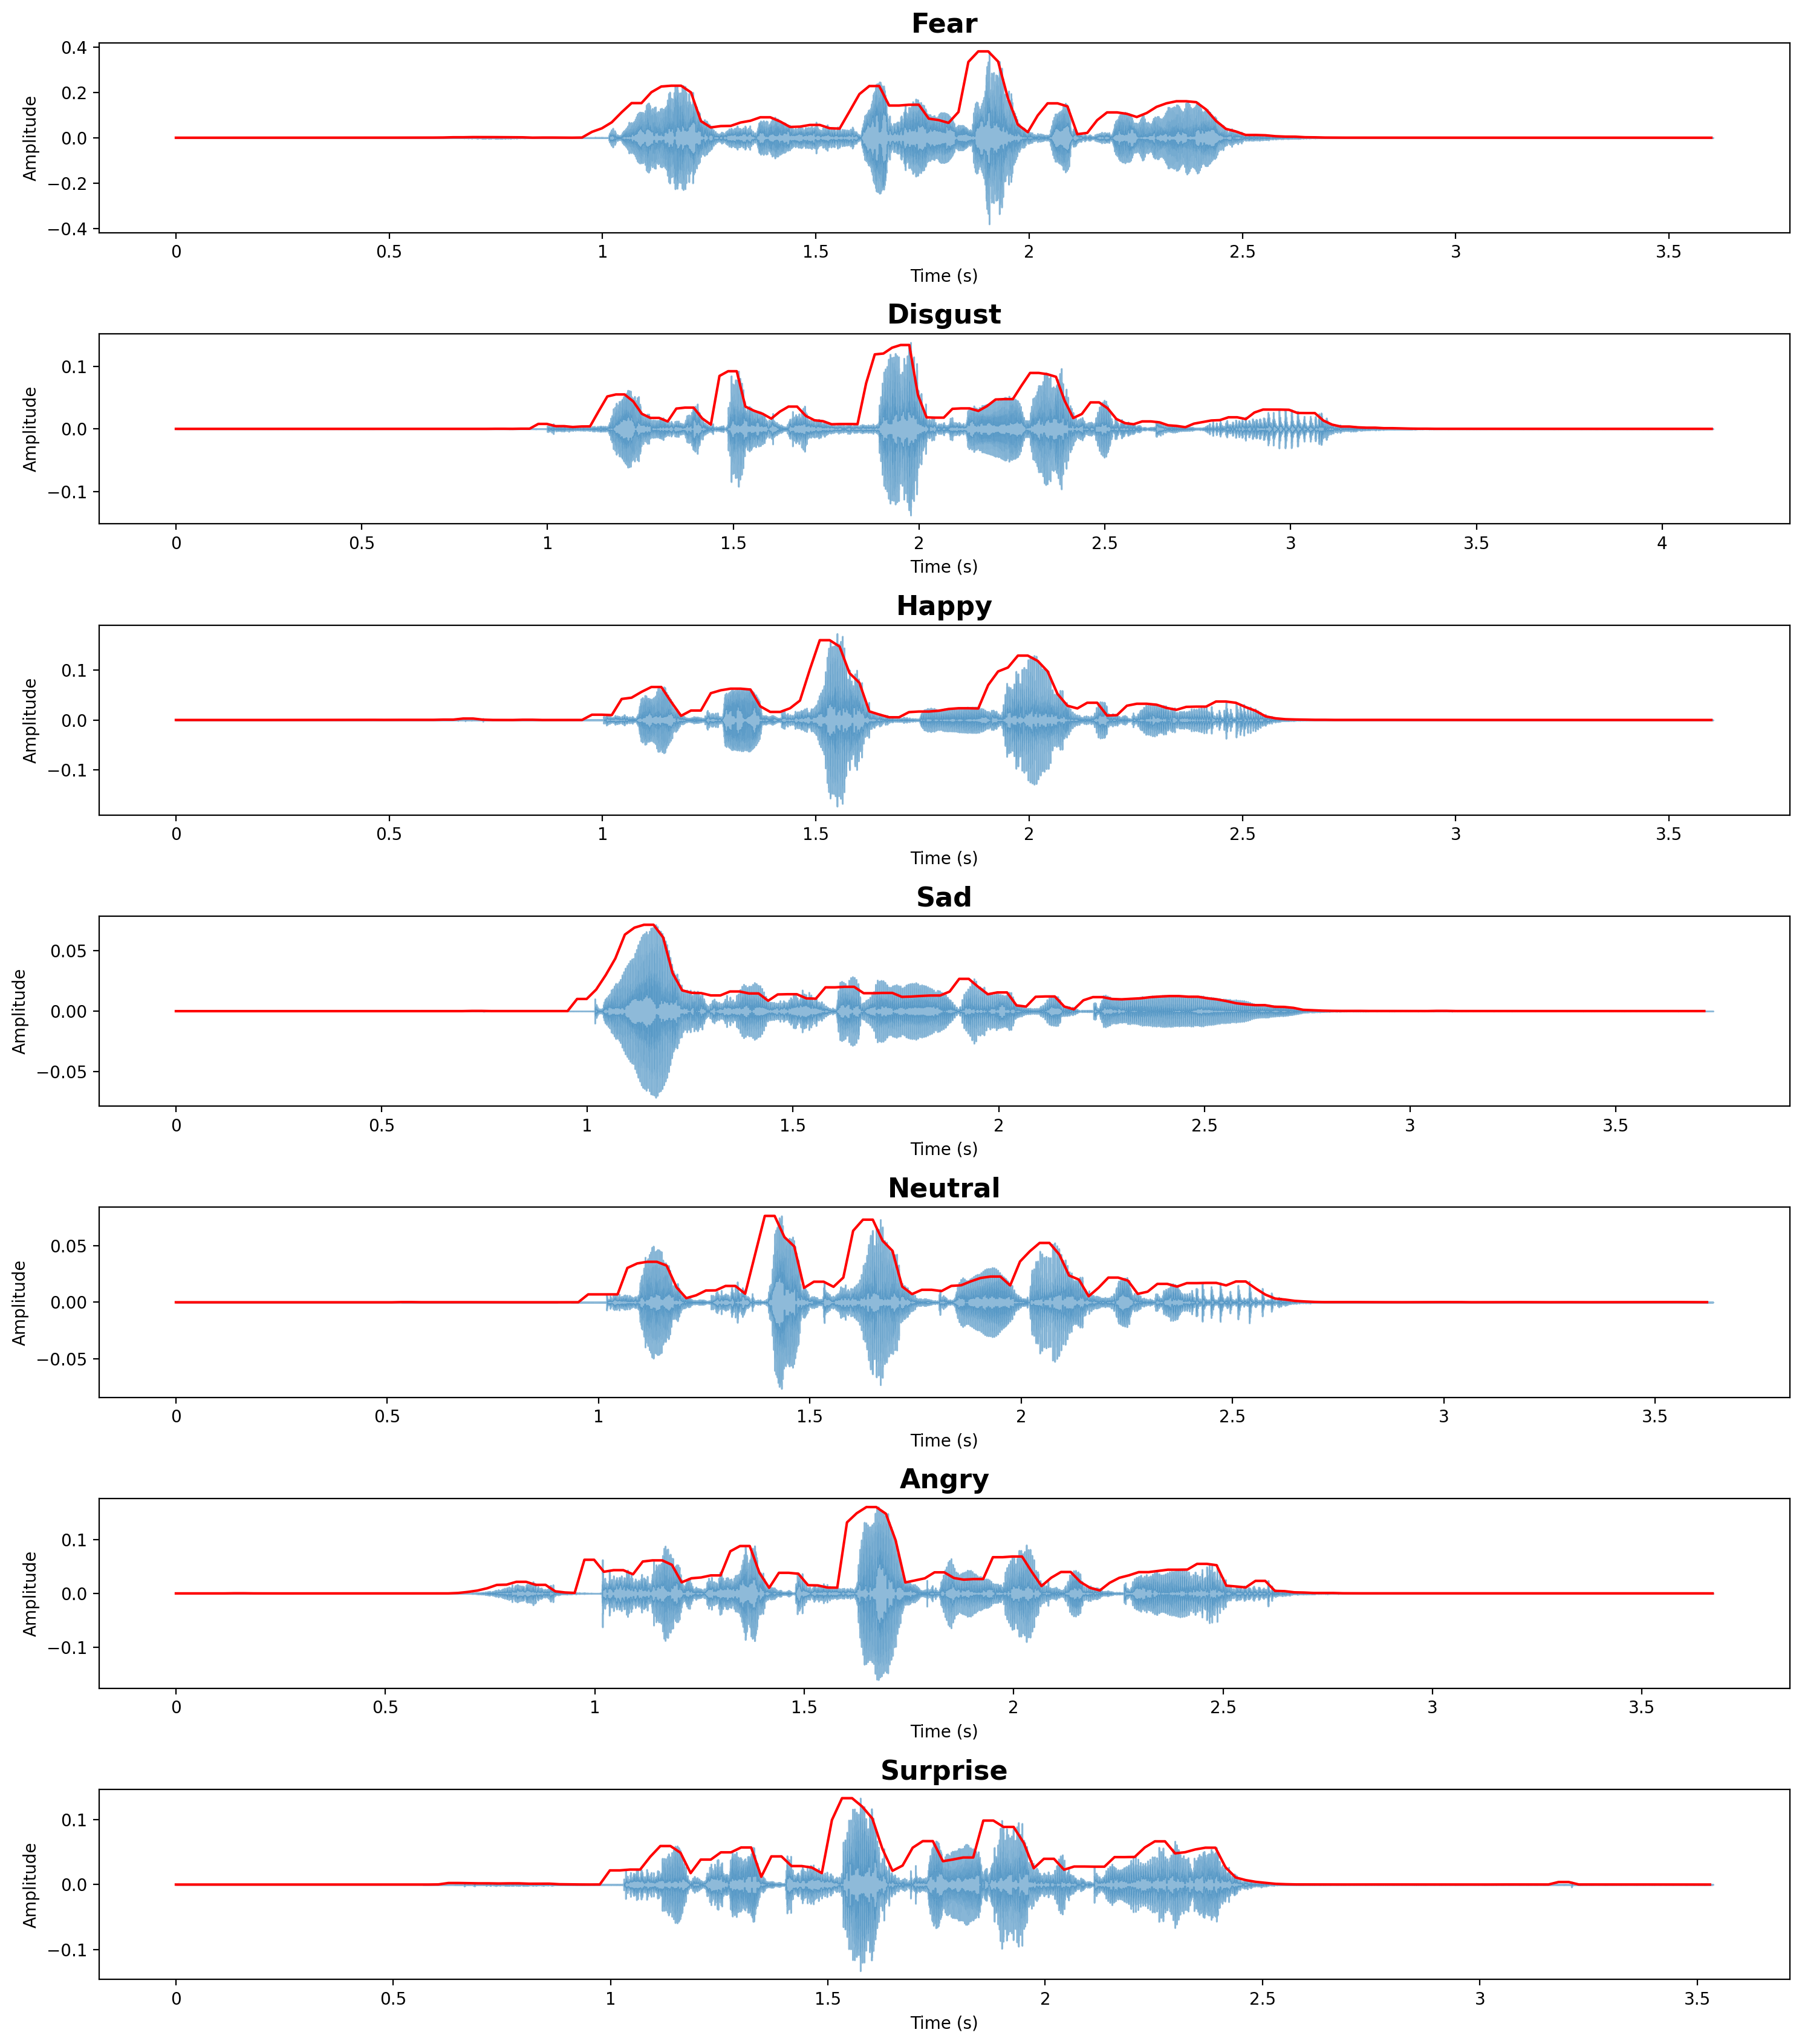

In [95]:

# Parameters
frame_size = 1024
hop_length = 512
font2 = {'size': 16, 'weight': 'bold'}

# Function to calculate the amplitude envelope
def amplitude_env(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

# Emotions list to iterate through
emotions = ['fear', 'disgust', 'happy', 'sad', 'neutral', 'angry', 'surprise']

# Cache audio signals for each emotion to avoid redundant loading
emotion_signals = {}

# Set up the figure for the subplots
plt.figure(figsize=(15, 17), dpi=200)

# Process each emotion
for idx, emotion in enumerate(emotions):
    # If the emotion's audio signal is not already loaded, load it
    if emotion not in emotion_signals:
        # Get the first audio path for each emotion and load the signal
        audio_path = Ravdess_df[Ravdess_df['Emotions'] == emotion]['Path'].iloc[0]
        signal, sr = librosa.load(audio_path)
        emotion_signals[emotion] = (signal, sr)
    
    signal, sr = emotion_signals[emotion]
    
    # Calculate the amplitude envelope
    amplitude_envelope = amplitude_env(signal, frame_size, hop_length)
    
    # Convert frame indices to time
    frames = range(0, amplitude_envelope.size)
    times = librosa.frames_to_time(frames, hop_length=hop_length, sr=sr)
    
    # Plot waveform and amplitude envelope
    plt.subplot(len(emotions), 1, idx + 1)  # Dynamically set the number of rows
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    plt.plot(times, amplitude_envelope, color='r')
    plt.title(emotion.capitalize(), fontdict=font2)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

# Display the plots
plt.tight_layout()
plt.show()

In [74]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Ravdess_df.Path)[1]
data, sample_rate = librosa.load(path)

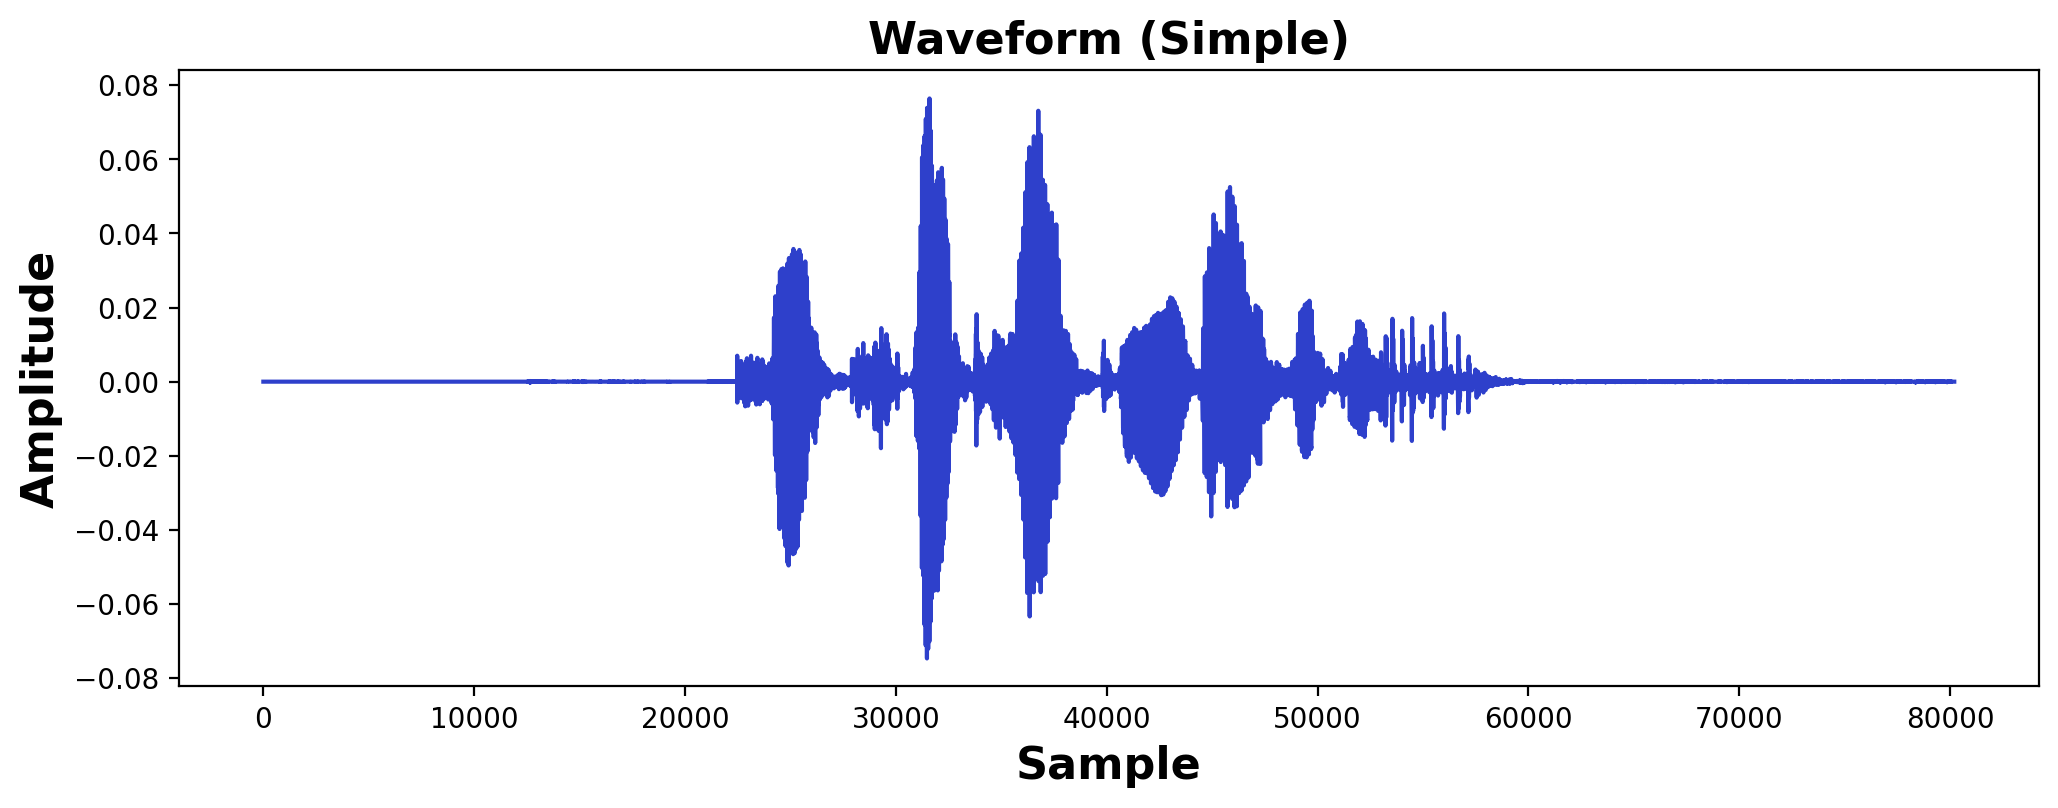

In [75]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

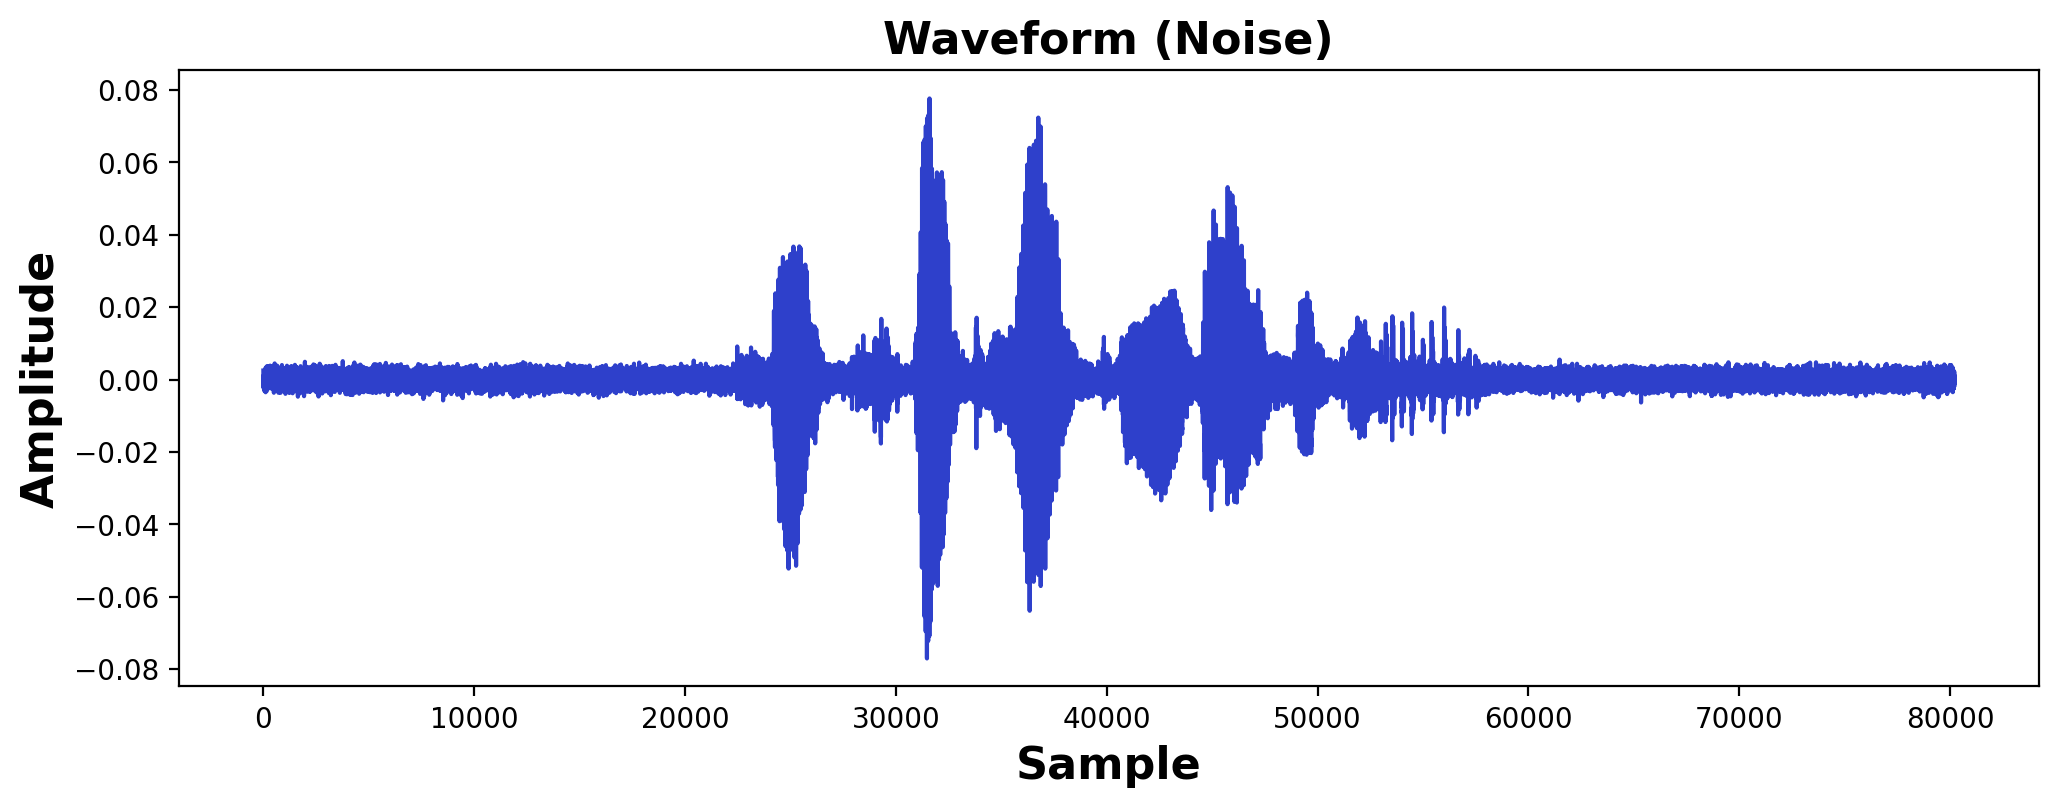

In [76]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

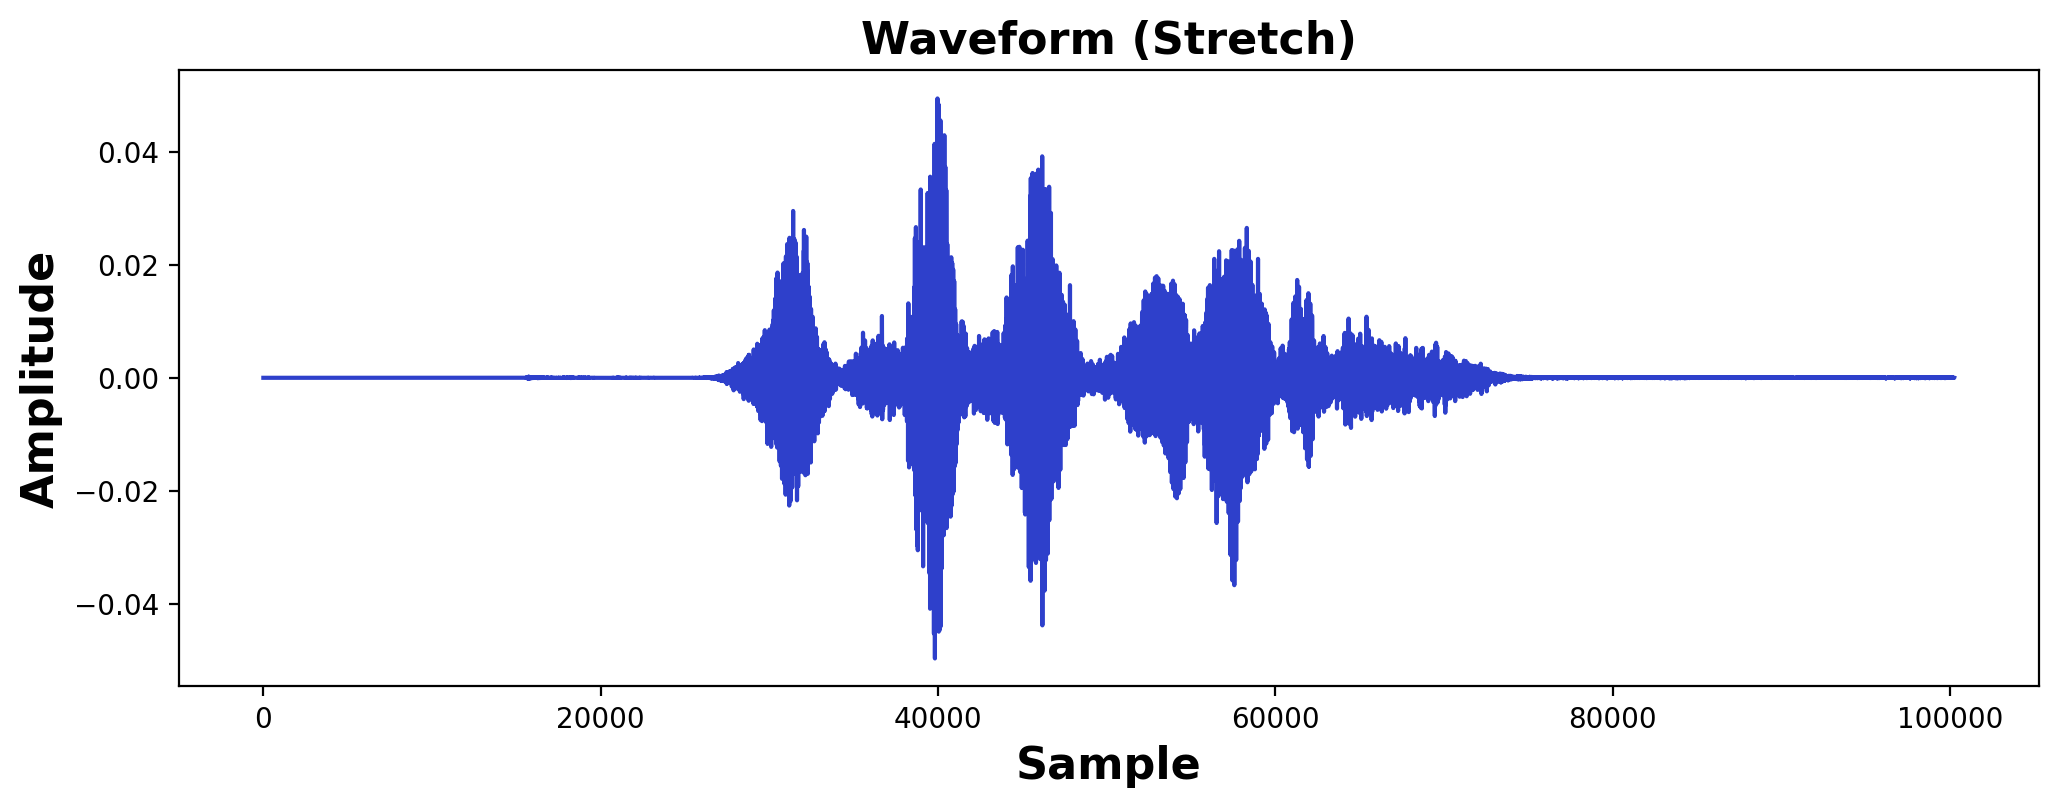

In [77]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import librosa
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split
import time

# Data preparation
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Apply extract_mfcc to each file in the dataframe
X_mfcc = Ravdess_df['Path'].apply(lambda x: extract_mfcc(x))

# Convert the list to numpy array and expand dimensions for PyTorch input
X = np.array([x for x in X_mfcc])
X = np.expand_dims(X, -1)

# One-hot encode the labels
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(Ravdess_df[['Emotions']])

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the model (LSTM)
class EmotionRecognitionModel(nn.Module):
    def __init__(self):
        super(EmotionRecognitionModel, self).__init__()
        # Using LSTM with input_size=40 (number of MFCCs) and hidden_size=256
        self.lstm = nn.LSTM(input_size=40, hidden_size=256, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 8)  # Assuming you have 8 classes (Emotions)
    
    def forward(self, x):
        # Ensure input is (batch_size, seq_len, input_size) 
        # Expand dimensions if necessary (batch_size, 1, 40) for LSTM input
        if x.dim() == 2:  # If input is 2D (batch_size, input_size), expand it
            x = x.unsqueeze(1)  # Add seq_len dimension
        
        # LSTM layer, returns output and hidden states
        x, _ = self.lstm(x)  # x has shape (batch_size, seq_len, hidden_size)
        
        # Take the last time step output from the LSTM (index -1)
        x = x[:, -1, :]  # Shape: (batch_size, hidden_size)
        
        # Apply Dropout and Dense layers
        x = self.dropout1(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x



# Initialize the model
model = EmotionRecognitionModel()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10  # Early stopping patience
best_val_loss = float('inf')
epochs_since_improvement = 0

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Train the model
    for inputs, labels in train_loader:
        # inputs: (batch_size, 40, 1)
        inputs = inputs.squeeze(-1)  # Remove the last dimension to match LSTM input (batch_size, 40)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])  # Use the index of the max label for cross entropy
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        _, labels_max = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == labels_max).sum().item()
    
    # Print stats every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")
    
    # Validation step (for early stopping)
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.squeeze(-1)
            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            _, labels_max = torch.max(labels, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels_max).sum().item()
    
    print(f"Validation Loss: {val_loss/len(test_loader):.4f}, Validation Accuracy: {100 * correct_val/total_val:.2f}%")
    
    # # Early stopping check
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss
    #     epochs_since_improvement = 0
    #     torch.save(model.state_dict(), 'best_model.pth')
    # else:
    #     epochs_since_improvement += 1
    #     if epochs_since_improvement >= patience:
    #         print(f"Early stopping at epoch {epoch+1}")
    #         break

# Load the best model for testing
model.load_state_dict(torch.load('best_model.pth'))

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.squeeze(-1)
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        _, labels_max = torch.max(labels, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels_max).sum().item()

print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {100 * correct_test/total_test:.2f}%")


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Validation Loss: 2.0515, Validation Accuracy: 13.19%
Validation Loss: 1.9798, Validation Accuracy: 22.22%
Validation Loss: 1.9040, Validation Accuracy: 25.35%
Validation Loss: 1.8641, Validation Accuracy: 28.12%
Validation Loss: 1.8391, Validation Accuracy: 29.86%
Validation Loss: 1.7737, Validation Accuracy: 31.94%
Validation Loss: 1.7183, Validation Accuracy: 34.72%
Validation Loss: 1.6939, Validation Accuracy: 35.42%
Validation Loss: 1.6730, Validation Accuracy: 34.38%
Epoch 10/500, Loss: 1.6323, Accuracy: 38.11%
Validation Loss: 1.6358, Validation Accuracy: 37.15%
Validation Loss: 1.6417, Validation Accuracy: 38.89%
Validation Loss: 1.5976, Validation Accuracy: 39.93%
Validation Loss: 1.5857, Validation Accuracy: 42.01%
Validation Loss: 1.5564, Validation Accuracy: 39.24%
Validation Loss: 1.5557, Validation Accuracy: 38.54%
Validation Loss: 1.5774, Validation Accuracy: 38.19%
Validation Loss: 1.5852, Validation Accuracy: 37.85%
Validation Loss: 1.5492, Validation Accuracy: 40.62%
V

/tmp/ipykernel_30/4277471564.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))
